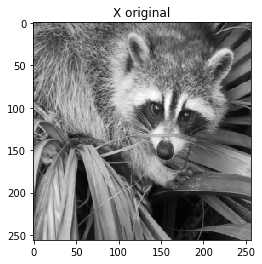

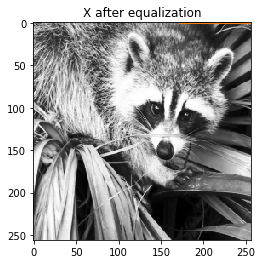

Text(0.5, 1.0, 'pdf after basic histogram equalization')

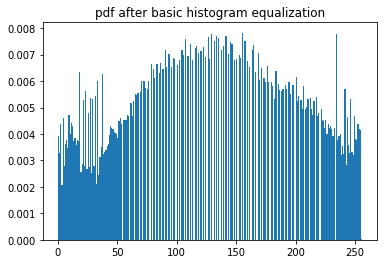

In [85]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np
#1
X = mpimg.imread('X.png') 
X = X*255


plt.imshow(X) 
plt.gray()
plt.title('X original')
plt.show()


pdf, bins, patches = plt.hist(X.flatten(), bins=256, range=(0,256), density=True)
[R,C]=X.shape

cdf, bins, patches = plt.hist(X.flatten(), bins=256, range=(0,256), density=True,cumulative=True)


Tx=np.zeros(256)

Tx=cdf
Tx=255*Tx
Y=np.zeros((R,C))
for i in range(R):
    for j in range(C):
        a=X[i,j]
        Y[i,j]=Tx[int(a)]
        
plt.imshow(Y) 
plt.gray()
plt.title('X after equalization')
plt.show()

pdf, bins, patches = plt.hist(Y.flatten(), bins=256, range=(0,256), density=True)
plt.title('pdf after basic histogram equalization')


(65536,)
(65536,)


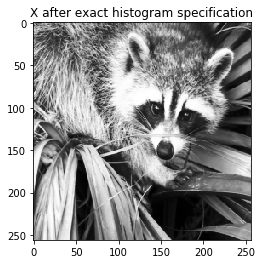

Text(0.5, 1.0, 'pdf after exact histogram specification')

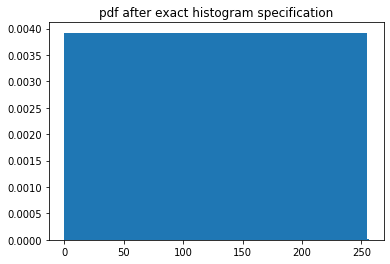

In [84]:
from scipy import ndimage
w2 = np.array([[0,1,0], [1,1,1], [0,1,0]])
w2 = w2/5
w3 = np.array([[1,1,1], [1,1,1], [1,1,1]])
w3=w3/9
w4 = np.array([[0,0,1,0,0], [0,1,1,1,0], [1,1,1,1,1],[0,1,1,1,0],[0,0,1,0,0]])
w4=w4/13
w5 = np.array([[0,1,1,1,0], [1,1,1,1,1], [1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]])
w5=w5/21
X_w2=ndimage.convolve(X, w2, mode='nearest')
X_w3=ndimage.convolve(X, w3, mode='nearest')
X_w4=ndimage.convolve(X, w4, mode='nearest')
X_w5=ndimage.convolve(X, w5, mode='nearest')


ind = np.lexsort((X_w5.flatten(),X_w4.flatten(),X_w3.flatten(),X_w2.flatten(),X.flatten()))
print(ind.shape)
ind_2d=np.unravel_index(ind, (256,256))
print(ind_2d[1].shape)
row=ind_2d[0]
col=ind_2d[1]
X_equa=np.zeros([R,C])
for i in range(R*C):
    r=row[i]
    c=col[i]
    X_equa[r,c]=255*i/(R*C-1)

plt.imshow(X_equa) 
plt.gray()
plt.title('X after exact histogram specification')
plt.show()

pdf, bins, patches = plt.hist(X_equa.flatten(), bins=256, range=(0,256), density=True)    
plt.title('pdf after exact histogram specification')

#After exact histogram specification, we have a desired equalized shape for the histogram.
# It's more equalized than basic histogram equalization in 1 